# Évaluer l'impact des facteurs biomédicaux sur la probabilité de développer de l'arthrose

**Contexte**

La clinique  Vital Joint Wellness Clinic souhaite mieux comprendre les facteurs contribuant au développement de l'arthrose chez ses patients. L'objectif est d'identifier l'impact des différents facteurs biomédicaux sur la probabilité de développer cette condition. Ces facteurs comprennent les niveaux de sucre dans le sang (glycémie), les niveaux de lipides dans le sang (cholestérol), l'âge, le genre, et la prise de traitements médicaux.

## Mise en situation

Le but de cette mission consiste à démystifier à combien de possibilité près de développer une arthrose. La clinique  Vital Joint Wellness Clinic  souhaite précisément connaître les facteurs qui contribuent à cette maladie. En effet, cette clinique, dans son bilan semestriel réalise que plusieurs sont les patients qui souffrent de cette maladie.  

**Question de recherche : Quel est l'impact des facteurs biomédicaux sur la probabilité de développer de l'arthrose ?**



## Importation des bibliothèques pour notre mission

In [1]:
# Importation des bibliothèques
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

## Importation de la base de données

In [2]:
donne_arthrose = pd.read_excel(r'c:\Users\ARMIDE Informatique\Desktop\Formation pratique\DonneSante.xlsx')

# afficher les données
donne_arthrose 

,Unnamed: 0.2,Arthrose,age,taux_de_cholesterol,taux_de_glycemie,Medicament,pression_arterielle,Unnamed: 0,Sexe,Medicament_code,Arthrose_code,Unnamed: 0.1,Sexe.1
0,0,oui,52,165,73,Rosuvastatine,175,0,0,0,0,0,Masculin
1,1,oui,39,228,104,Simvastatine,132,1,1,1,0,1,Masculin
2,2,non,69,229,86,Rosuvastatine,125,2,0,0,1,2,Feminin
3,3,oui,70,161,107,Rosuvastatine,99,3,1,0,0,3,Masculin
4,4,non,43,289,136,Rosuvastatine,112,4,0,0,1,4,Feminin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,non,65,219,121,Doliprane,115,95,0,2,1,95,Feminin
96,96,oui,69,260,133,Rosuvastatine,179,96,1,0,0,96,Feminin
97,97,oui,79,214,95,Simvastatine,161,97,1,1,0,97,Masculin
98,98,oui,86,270,130,Rosuvastatine,140,98,0,0,0,98,Masculin


## 1. Pré-traitement de la base de données

<Axes: >

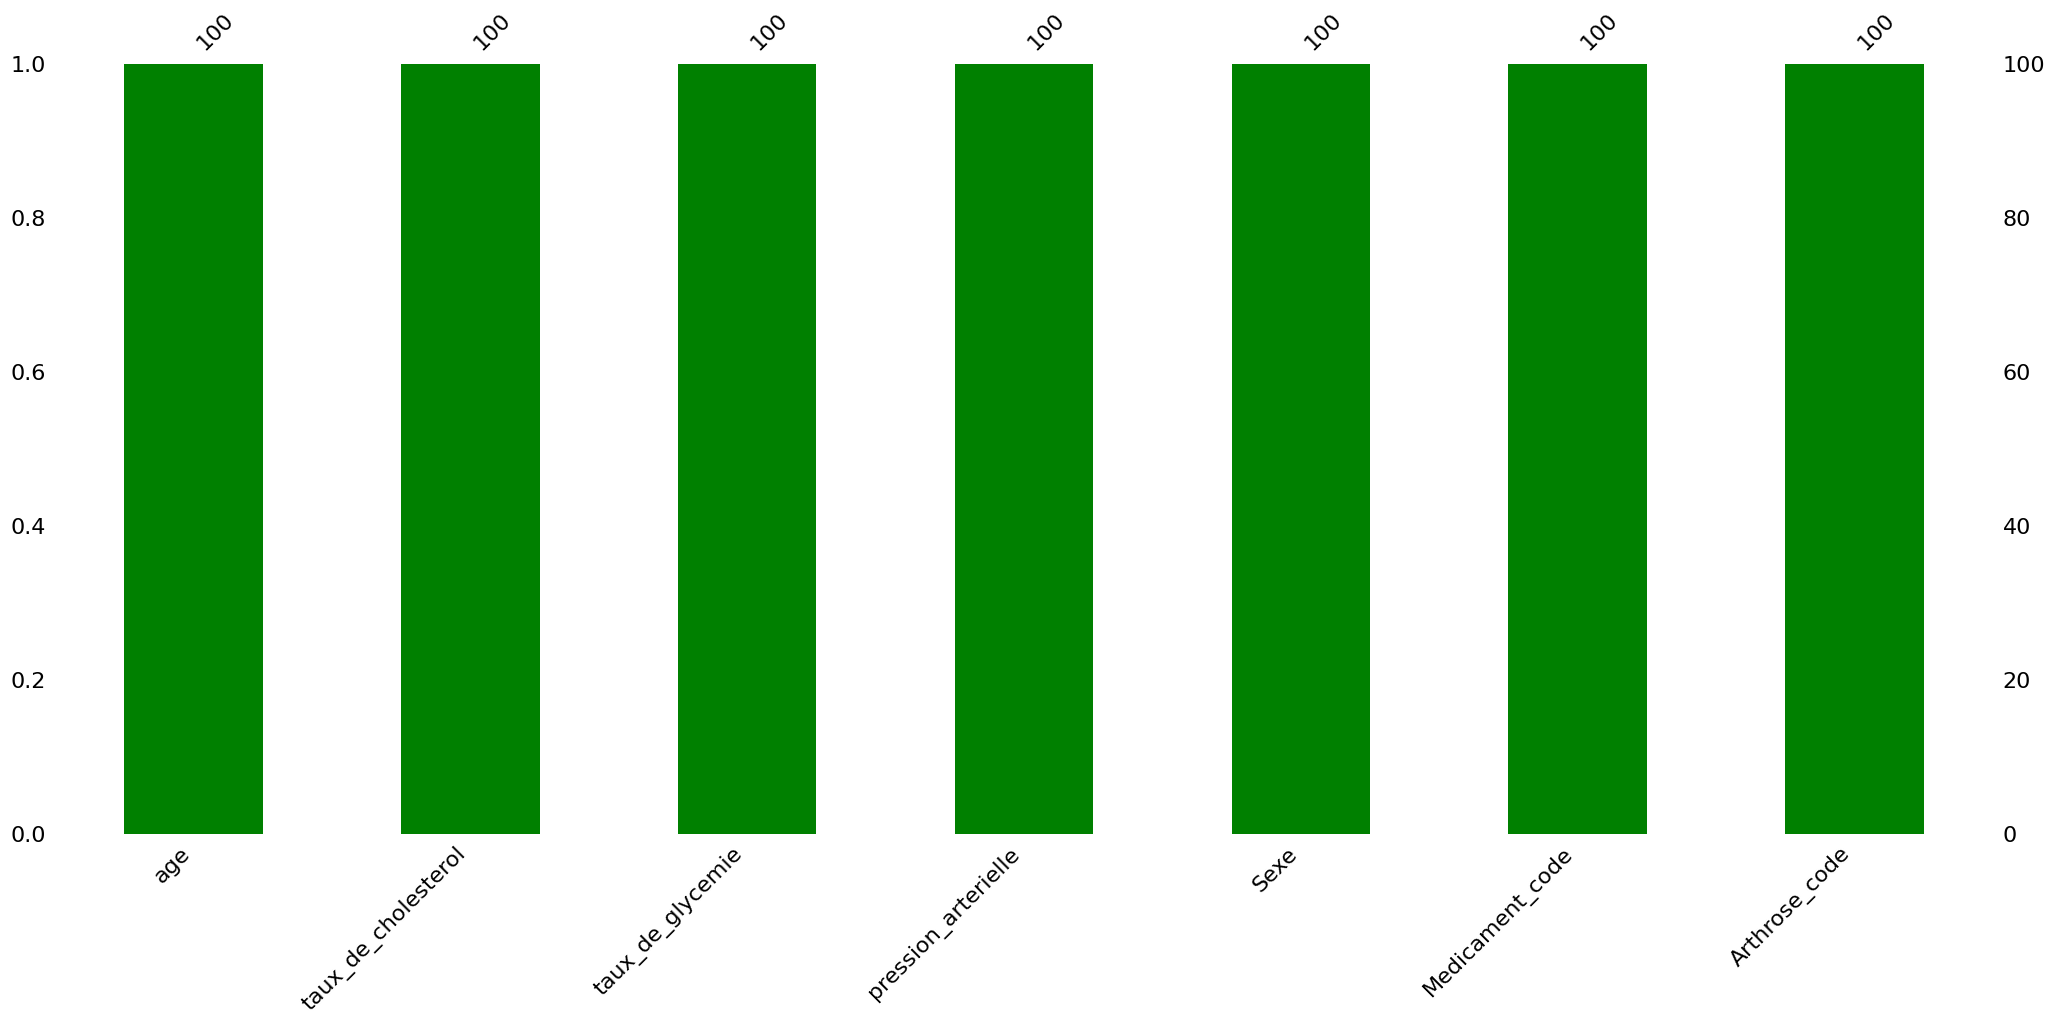

In [3]:
#écarter les variables catégorielles dans la base de données
numericData = donne_arthrose.select_dtypes(exclude=['object']) 

#supprimer certaines variables inutiles dans la base de données
execptData =numericData.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0']) 

#afficher graphiquement les données manquantes de la base de données
msno.bar(execptData, color='green') 

### 1.1. Détection des valeurs abérrantes

In [4]:
#détection les valeurs abérrantes par la méthode IQR
Q1 =  execptData.quantile(0.25)
Q3 =  execptData.quantile(0.75)
IQR = Q3 - Q1

outliers = ((execptData<(Q1-1.5*IQR))|(execptData >(Q3+1.5*IQR)))
valeurs_aberrantes=execptData[outliers.any(axis=1)]

# affichage des résultats
print("les valeurs aberrantes sont : ")
valeurs_aberrantes


les valeurs aberrantes sont : 


,age,taux_de_cholesterol,taux_de_glycemie,pression_arterielle,Sexe,Medicament_code,Arthrose_code


Les résultats de la méthode IQR appliquée sur notre jeu de données montre que les variables ne présentent pas de valeurs abérrantes. Ce qui est un facteur très prometteur sur la performance du modèle qu'on utilisera. De plus, le graphique ci-dessus montre avec certitude que notre base de données ne présente ni de doublons, ni de valeurs manquantes, avançant très bien notre étude.

## 2. Analyse exploratoire des données

### 2.1. Statistique descriptive

In [5]:
statistic= execptData.describe()
statistic

,age,taux_de_cholesterol,taux_de_glycemie,pression_arterielle,Sexe,Medicament_code,Arthrose_code
count,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000
mean,56.100000,227.600000,111.790000,131.870000,0.55,1.090000,0.480000
std,20.637076,44.599678,20.131033,25.040837,0.50,0.842015,0.502117
min,20.000000,150.000000,72.000000,90.000000,0.00,0.000000,0.000000
25%,37.750000,186.250000,95.000000,111.500000,0.00,0.000000,0.000000
50%,57.000000,229.000000,114.000000,130.000000,1.00,1.000000,0.000000
75%,74.000000,269.250000,127.000000,154.000000,1.00,2.000000,1.000000
max,90.000000,299.000000,150.000000,179.000000,1.00,2.000000,1.000000


### 2.2. Visualisation de la distribution des variables numériques et catégorielles

C:\Users\ARMIDE Informatique\AppData\Local\Temp\ipykernel_6824\25188584.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Arthrose_code', data=dataexpect, palette='muted',color='purple')


[Text(0.5, 1.0, 'Histogramme et densité des variables')]

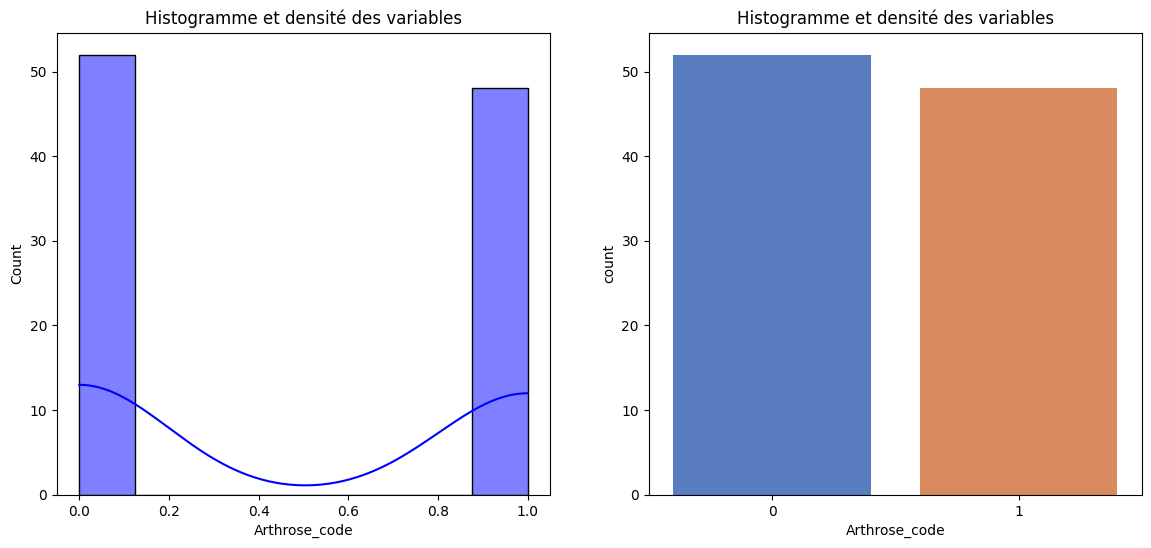

In [6]:
dataexpect = donne_arthrose.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
fig, ax =plt.subplots(1,2,figsize=(14,6))
sns.histplot(dataexpect['Arthrose_code'], kde=True, color='blue', ax=ax[0])
ax[0].set(
    title='Histogramme et densité des variables'
)
sns.countplot(x='Arthrose_code', data=dataexpect, palette='muted',color='purple')
ax[1].set(
    title='Distribution des variables catégorielles'
)

Avant tout, nous avons réalisé une EDA  afin de connaître les relations qui existent entre la variable cible et les prédicteurs. Les visualisations des données ci-dessous réalisées montre que notre jeu de données ne contient pas d’outliers ou des valeurs manquantes qui pourraient biaiser les résultats. De plus, l’histogramme et le countplot réalisés sont des graphiques qui ont permis de voir la relation de la cible et des prédicteurs.

## 2.3. Normalisation des données

La normalisation est l'une des techniques du feature engineering qui aide à plus parfaire les données avant l'entraînement et l'évaluation de la performance prédictive. Plus précisément, c'est une méthode qui va transformer les valeurs de nos variables comprises entre 0 et 1.

In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler()
variables =['age', 'taux_de_cholesterol', 'taux_de_glycemie', 'pression_arterielle','Sexe', 'Medicament_code', 'Arthrose_code']
data_normalized= execptData.copy()
data_normalized[variables] = min_max_scaler.fit_transform(execptData[variables])
data_normalized

,age,taux_de_cholesterol,taux_de_glycemie,pression_arterielle,Sexe,Medicament_code,Arthrose_code
0,0.457143,0.100671,0.012821,0.955056,0.0,0.0,0.0
1,0.271429,0.523490,0.410256,0.471910,1.0,0.5,0.0
2,0.700000,0.530201,0.179487,0.393258,0.0,0.0,1.0
3,0.714286,0.073826,0.448718,0.101124,1.0,0.0,0.0
4,0.328571,0.932886,0.820513,0.247191,0.0,0.0,1.0
...,...,...,...,...,...,...,...
95,0.642857,0.463087,0.628205,0.280899,0.0,1.0,1.0
96,0.700000,0.738255,0.782051,1.000000,1.0,0.0,0.0
97,0.842857,0.429530,0.294872,0.797753,1.0,0.5,0.0
98,0.942857,0.805369,0.743590,0.561798,0.0,0.0,0.0


## 3. Entraînement du modèle

### 3.1. Division des données en sous-ensemble d'entraînement et de test

In [38]:

from sklearn.linear_model import LogisticRegression

# Assuming 'data_normalized' is your DataFrame with normalized data
y = data_normalized['Arthrose_code']  # Target variable
x = data_normalized[['age', 'taux_de_cholesterol', 'taux_de_glycemie', 'pression_arterielle', 'Sexe', 'Medicament_code']]  # Predictors

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### 3.2. Ajustement du modèle

In [39]:
# Initialize and fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Retrieve coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Display results
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.28376802 -0.46718689 -0.3034121  -0.05119438 -0.21412542 -0.1695693 ]
Intercept: 0.6740521034235385


Le coefficient de "**age**" est **"-0.28376802"**. Cela signifie que pour chaque année d'augmentation de l'âge, les chances de Arthrose_code diminuent de exp(-0.28376802), où exp représente la fonction exponentielle.

De même, pour "**taux_de_cholesterol**", un coefficient de **"-0.46718689"** indique que pour chaque unité d'augmentation du taux de cholestérol, les chances de Arthrose_code diminuent de exp(-0.46718689).

**Résumé :** Les résultats de l'ajustement avec la régression logistique montre que nos prédicteurs présentent tous des coéfficients négatifs. Ce qui signifie qu'un coefficient négatif diminue le risque de développer une arthrose. Il est crucial de noter que ces interprétations sont basées sur l'hypothèse que le modèle est approprié pour les données et que les conditions de validité de la régression logistique sont respectées (par exemple, linéarité en logarithme des cotes, absence de multicolinéarité significative, etc.)

Par contre, malgré que les coéfficients offrent un bon résultat, fort est de constater que les coéfficients ne sont significativement statistiques. 

**Important :** A partir de là, il serait judicieux d’explorer d’autres variables ou modèles afin d’améliorer la prédiction et la probabilité  de développer de l’arthrose chez les patients de la clinique Vital Joint Wellness Clinic.

## 4. Evaluation de la performance prédictive

A la base, les résultats de notre entraînement de modèle sont largement suffisants pour envoyer une note à la clinique sur les prochaines actions à mener. Mais, il est préférable de tester la capacité prédictive de notre modèle afin de savoir avec précision ce qui incombent l’entreprise de faire. Pour cela, nous allons utiliser l’algorithme de l’apprentissage automatique (machine learning) et voici les résultats de notre analyse :  

### 4.1. Histogramme de la probabilité de prédiction

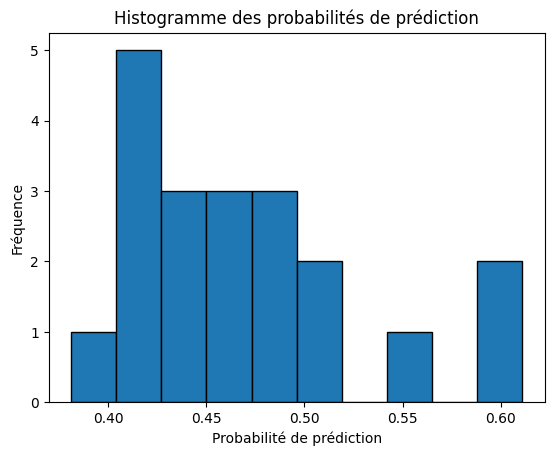

In [41]:
# Prédiction
y_pred = model.predict(x_test)

# Probabilité de la prédiction
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Histogramme de la probabilité de prédiction
plt.hist(y_pred_proba, bins=10, edgecolor='k')
plt.xlabel('Probabilité de prédiction')
plt.ylabel('Fréquence')
plt.title('Histogramme des probabilités de prédiction')
plt.show()

Ce graphique montre clairement une distribution centrée autour d'une probabilité moyenne, avec une variabilité modérée autour de cette valeur centrale. Ce qui peut indiquer une incertitude modérée dans les prédictions du modèle.

### 4.2. Métriques de performances

In [42]:
# Calcul des métriques de performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Affichage de l'accuracy et du rapport de classification
print('Accuracy:', accuracy)
print('Classification Report:')
print(class_report)

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.80      0.62        10
         1.0       0.50      0.20      0.29        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.45        20
weighted avg       0.50      0.50      0.45        20



- **Accuracy et Métriques de Classification**

L'accuracy globale de 50 % indique que votre modèle prédit correctement la classe pour la moitié des exemples. Cependant, comme vous l'avez mentionné, l'accuracy seule peut être trompeuse, surtout avec des classes déséquilibrées.

- **F1-score et Interprétation**

Pour la classe 0, un F1-score de 0,62 indique une mesure raisonnable de précision et de rappel combinés. En revanche, pour la classe 1, un F1-score de 0,29 est significativement plus bas, suggérant que le modèle a des difficultés à bien prédire cette classe.

#### Matrice de confusion

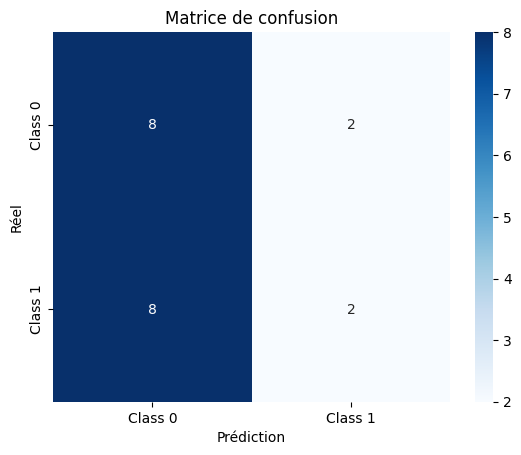

In [43]:
# Affichage de la matrice de confusion sous forme graphique
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

In [ ]:


# Création de la figure avec subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogramme des probabilités de prédiction
axes[0, 0].hist(y_pred_proba, bins=10, edgecolor='k')
axes[0, 0].set_xlabel('Probabilité de prédiction')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_title('Histogramme des probabilités de prédiction')

# Matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0, 1])
axes[0, 1].set_xlabel('Prédiction')
axes[0, 1].set_ylabel('Réel')
axes[0, 1].set_title('Matrice de confusion')

# Courbe ROC
axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (area = %0.2f)' % roc_auc)
axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('Taux de faux positifs (FPR)')
axes[1, 0].set_ylabel('Taux de vrais positifs (TPR)')
axes[1, 0].set_title('Receiver Operating Characteristic (ROC)')
axes[1, 0].legend(loc="lower right")

# Supprimer le subplot vide
fig.delaxes(axes[1, 1])

# Ajustement de l'espacement entre les sous-graphes
fig.tight_layout()

# Affichage de la figure
plt.show()


: 

In [ ]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


: 

In [ ]:
model = LogisticRegression(max_iter=1000)  # Initialisation du modèle avec un nombre maximum d'itérations
model.fit(X_train, y_train)  # Entraînement du modèle
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print("Coefficients du modèle :")
print(coefficients)


: 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Exemple de chargement des données
y = execptData['Arthrose_code']  # Variable cible
X = execptData[['age', 'taux_de_cholesterol', 'taux_de_glycemie', 'pression_arterielle', 'Sexe', 'Medicament_code']]  # Variables prédictives

X = sm.add_constant(X)
# Exemple de division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())


: 